# Analysis of NMF bicv for enterosignature rank choice

In [1]:
from statistics import median, mean
import json

import numpy as np


In [2]:
import matplotlib.pylab as plt

In [3]:
inpdir = f"/crex/proj/naiss2023-23-521/private/delaramb/r_notebooks/enterosignature-paper/result_bicv_rank_allsamples/all_controls_test_trials/"

In [4]:
# if True, outputs will be written

WRITE_OUTPUT = True

output = inpdir #"bicv_rank_analysis/"

## Explained variance

In [5]:
raw_file = inpdir + "biCV_evar.json"

In [6]:
with open(raw_file, "r") as f:
    raw = json.load(f)

In [7]:
resdic = {k: {"A": [], "B": [], "C": [], "D": []} for k in range(2,16)}
resA = {k: [] for k in range(2,16)}

#raw is a list of dicts
for d in raw: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic[int(rank)][letter].extend(d[mx][rank][letter])

In [8]:
#print([len(resdic[rank][letter]) for letter in "ABCD" for rank in resdic])

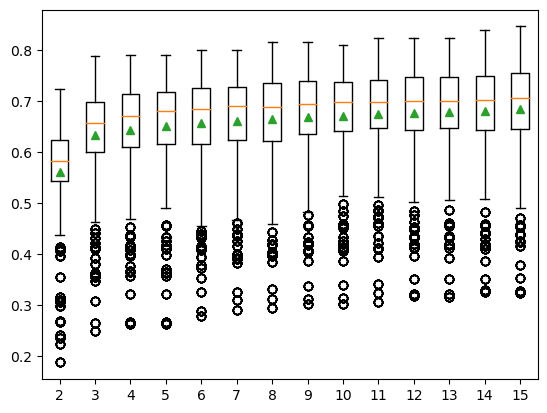

In [9]:
labels, data = [*zip(*resA.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data, showmeans=True)
plt.xticks(range(1, len(labels) + 1), labels)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_evar.tsv", "w") as f:
        for i in range(0, len(labels)):
            for j in data[i]:
                f.write(str(labels[i]) + "\t" + str(j) + "\n")

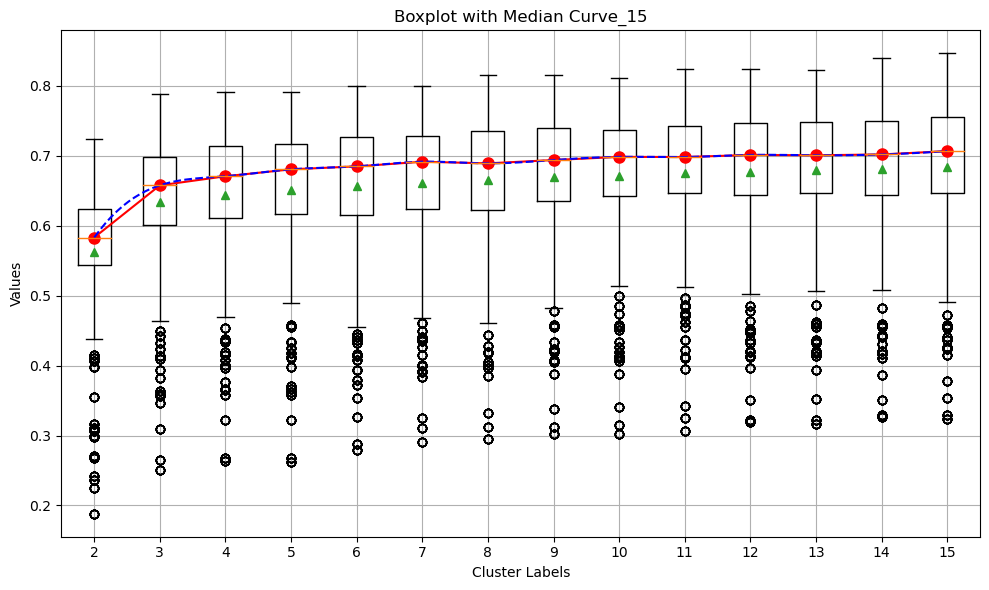

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming resA is your dictionary with cluster labels and data

# Extract labels and data from resA
labels, data = zip(*resA.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data, showmeans=True)

# Calculate medians
medians = [np.median(d) for d in data]

# Plot lines connecting the medians
plt.plot(range(1, len(labels) + 1), medians, marker='o', color='red', linestyle='-', markersize=8)

# Interpolate a curve connecting the medians
x_new = np.linspace(1, len(labels), 300)
spl = make_interp_spline(range(1, len(labels) + 1), medians, k=3)
y_smooth = spl(x_new)
plt.plot(x_new, y_smooth, color='blue', linestyle='--')

plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel('Cluster Labels')
plt.ylabel('Values')
plt.title('Boxplot with Median Curve_15')
plt.grid(True)
plt.tight_layout()
plt.show()

# Writing output
if WRITE_OUTPUT:
    with open(f"{output}/bicv_evar.tsv", "w") as f:
        for i in range(len(labels)):
            for j in data[i]:
                f.write(str(labels[i]) + "\t" + str(j) + "\n")


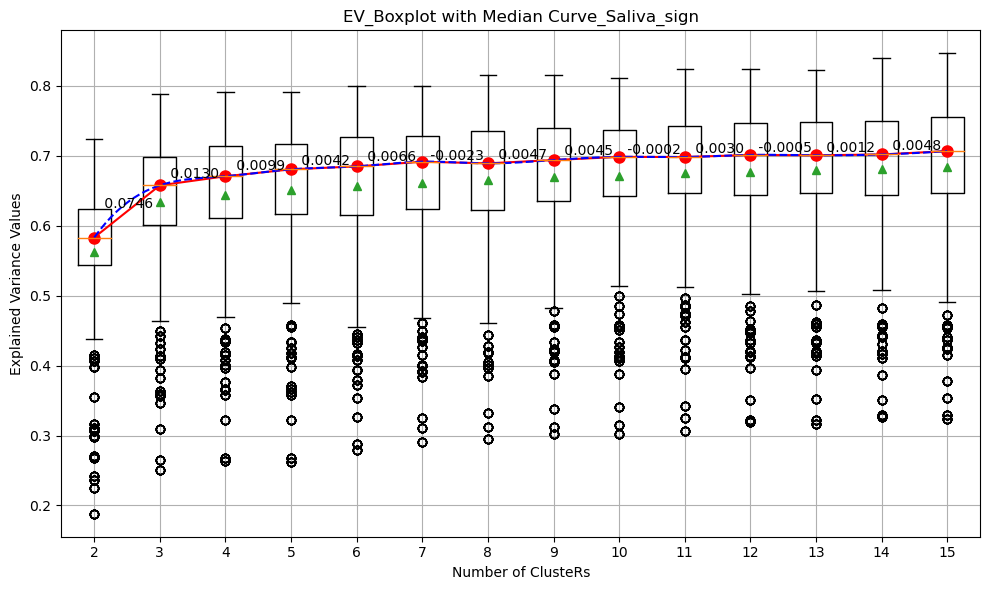

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract labels and data from resA
labels, data = zip(*resA.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data, showmeans=True)


# Calculate medians
medians = [np.median(d) for d in data]

# Plot lines connecting the medians
plt.plot(range(1, len(labels) + 1), medians, marker='o', color='red', linestyle='-', markersize=8)

# Calculate slope for each line between adjacent clusters
for i in range(len(medians) - 1):
    x1, y1 = i + 1, medians[i]
    x2, y2 = i + 2, medians[i + 1]
    slope = (y2 - y1) / (x2 - x1)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, f" {slope:.4f}", ha='center', va='bottom')
    

# Interpolate a curve connecting the medians
x_new = np.linspace(1, len(labels), 300)
spl = make_interp_spline(range(1, len(labels) + 1), medians, k=3)
y_smooth = spl(x_new)
plt.plot(x_new, y_smooth, color='blue', linestyle='--')

plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel('Number of ClusteRs')
plt.ylabel('Explained Variance Values')
plt.title('EV_Boxplot with Median Curve_Saliva_sign')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("ev_boxplot_with_slope_15_279genus.png")

plt.show()

# Writing output
if WRITE_OUTPUT:
    with open(f"{output}/bicv_evar.tsv", "w") as f:
        for i in range(len(labels)):
            for j in data[i]:
                f.write(str(labels[i]) + "\t" + str(j) + "\n")



In [12]:
meansA = {k: mean(resA[k]) for k in resA}
mediansA = {k: median(resA[k]) for k in resA}

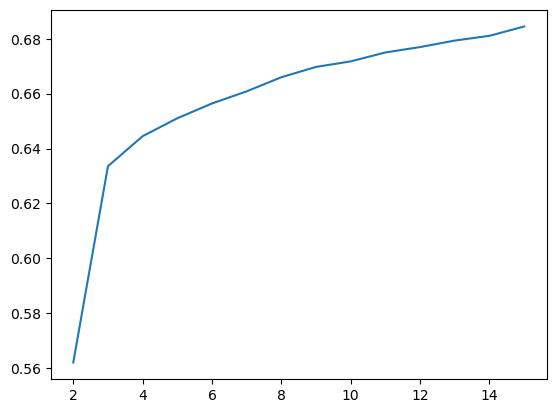

In [13]:
lists = sorted(meansA.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

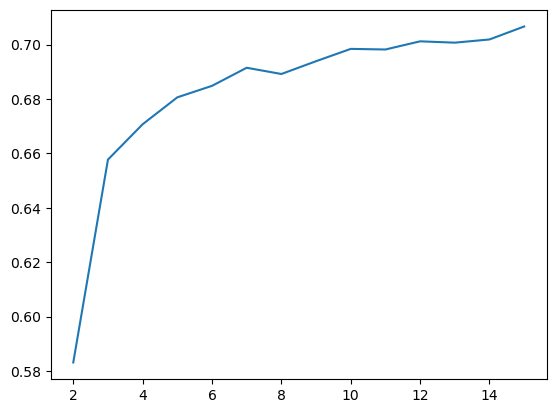

In [14]:
lists = sorted(mediansA.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## Reconstruction error

In [15]:
raw_re_file = inpdir + "biCV_reco_error.json"

In [16]:
with open(raw_re_file, "r") as f:
    raw_re = json.load(f)

In [17]:
resdic_re = {k: {"A": [], "B": [], "C": [], "D": []} for k in range(2,16)}
resA_re = {k: [] for k in range(2,16)}

#raw is a list of dicts
for d in raw_re: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_re[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_re[int(rank)][letter].extend(d[mx][rank][letter])

In [18]:
#print([len(resdic_re[rank][letter]) for letter in "ABCD" for rank in resdic_re])

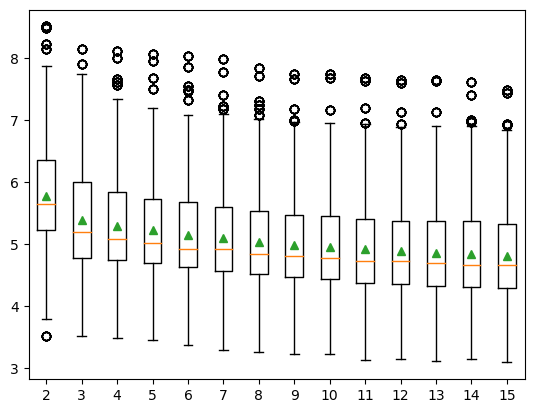

In [19]:
labels_re, data_re = [*zip(*resA_re.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_re, showmeans=True)
plt.xticks(range(1, len(labels_re) + 1), labels_re)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_recerror.tsv", "w") as f:
        for i in range(0, len(labels_re)):
            for j in data_re[i]:
                f.write(str(labels_re[i]) + "\t" + str(j) + "\n")

In [20]:
meansA_re = {k: mean(resA_re[k]) for k in resA_re}
mediansA_re = {k: median(resA_re[k]) for k in resA_re}

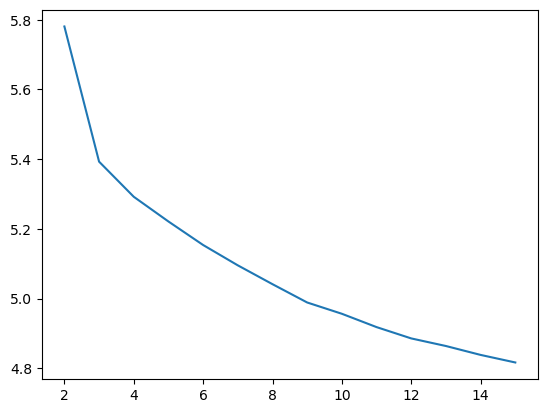

In [21]:
lists_re = sorted(meansA_re.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_re) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

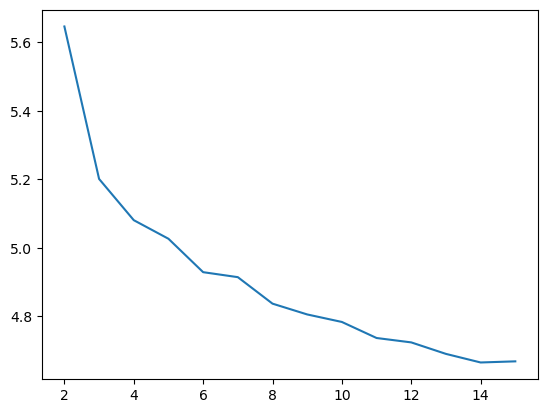

In [22]:
lists_re = sorted(mediansA_re.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_re) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## RSS

In [23]:
raw_rss_file = inpdir + "biCV_rss.json"

In [24]:
with open(raw_rss_file, "r") as f:
    raw_rss = json.load(f)

In [25]:
resdic_rss = {k: {"A": [], "B": [], "C": [], "D": []} for k in range(2,16)}
resA_rss = {k: [] for k in range(2,16)}

#raw is a list of dicts
for d in raw_rss: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_rss[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_rss[int(rank)][letter].extend(d[mx][rank][letter])

In [26]:
#print([len(resdic_rss[rank][letter]) for letter in "ABCD" for rank in resdic_rss])

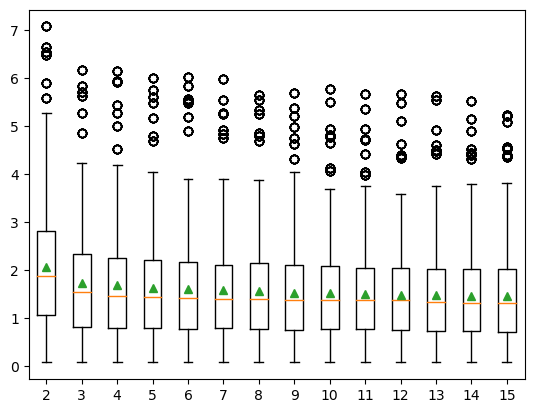

In [27]:
labels_rss, data_rss = [*zip(*resA_rss.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_rss, showmeans=True)
plt.xticks(range(1, len(labels_rss) + 1), labels_rss)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_rss.tsv", "w") as f:
        for i in range(0, len(labels_rss)):
            for j in data_rss[i]:
                f.write(str(labels_rss[i]) + "\t" + str(j) + "\n")

In [28]:
meansA_rss = {k: mean(resA_rss[k]) for k in resA_rss}
mediansA_rss = {k: median(resA_rss[k]) for k in resA_rss}

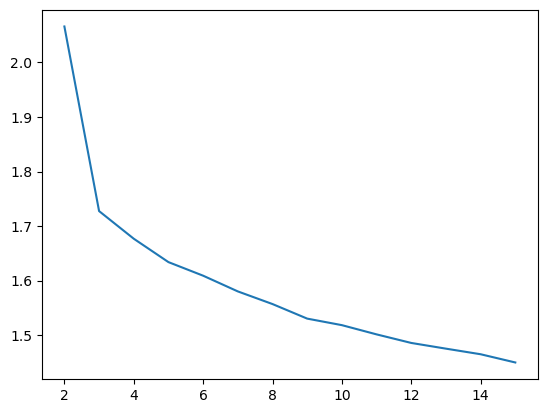

In [29]:
lists_rss = sorted(meansA_rss.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_rss) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

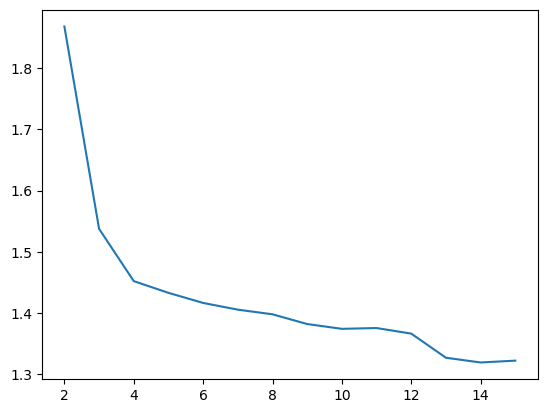

In [30]:
lists_rss = sorted(mediansA_rss.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_rss) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## Cosine similarity

In [31]:
raw_cosine_file = inpdir + "biCV_cosine.json"

In [32]:
with open(raw_cosine_file, "r") as f:
    raw_cosine = json.load(f)

In [33]:
resdic_cosine = {k: {"A": [], "B": [], "C": [], "D": []} for k in range(2,16)}
resA_cosine = {k: [] for k in range(2,16)}

#raw is a list of dicts
for d in raw_cosine: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_cosine[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_cosine[int(rank)][letter].extend(d[mx][rank][letter])

In [34]:
#print([len(resdic_cosine[rank][letter]) for letter in "ABCD" for rank in resdic_cosine])

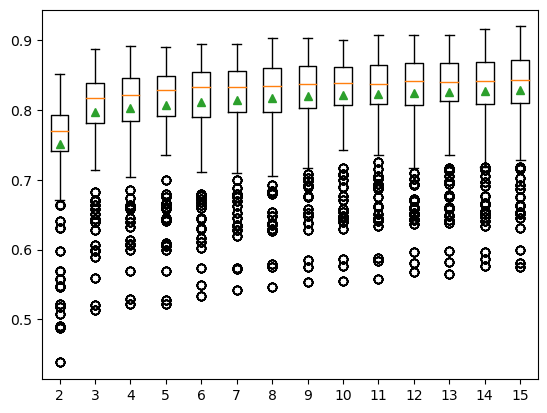

In [35]:
labels_cosine, data_cosine = [*zip(*resA_cosine.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_cosine, showmeans=True)
plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_cosine.tsv", "w") as f:
        for i in range(0, len(labels_cosine)):
            for j in data_cosine[i]:
                f.write(str(labels_cosine[i]) + "\t" + str(j) + "\n")

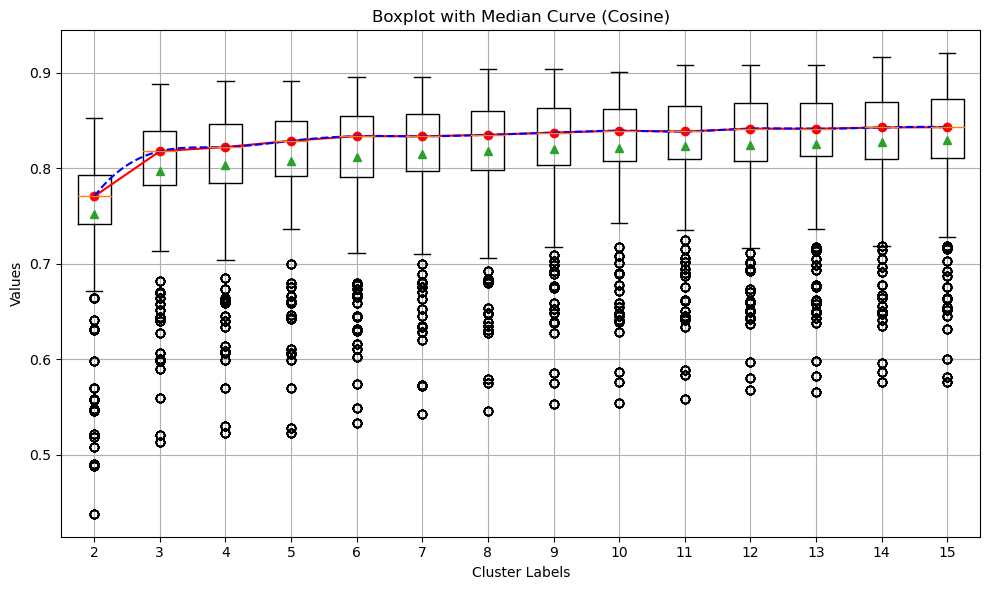

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract labels and data from resA_cosine
labels_cosine, data_cosine = zip(*resA_cosine.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data_cosine, showmeans=True)

# Calculate medians
medians_cosine = [np.median(d) for d in data_cosine]

# Plot lines connecting the medians
plt.plot(range(1, len(labels_cosine) + 1), medians_cosine, marker='o', color='red', linestyle='-')

# Interpolate a curve connecting the medians
x_new_cosine = np.linspace(1, len(labels_cosine), 300)
spl_cosine = make_interp_spline(range(1, len(labels_cosine) + 1), medians_cosine, k=3)
y_smooth_cosine = spl_cosine(x_new_cosine)
plt.plot(x_new_cosine, y_smooth_cosine, color='blue', linestyle='--')

plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
plt.xlabel('Cluster Labels')
plt.ylabel('Values')
plt.title('Boxplot with Median Curve (Cosine)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Writing output
if WRITE_OUTPUT:
    with open(f"{output}/bicv_cosine.tsv", "w") as f:
        for i in range(len(labels_cosine)):
            for j in data_cosine[i]:
                f.write(str(labels_cosine[i]) + "\t" + str(j) + "\n")


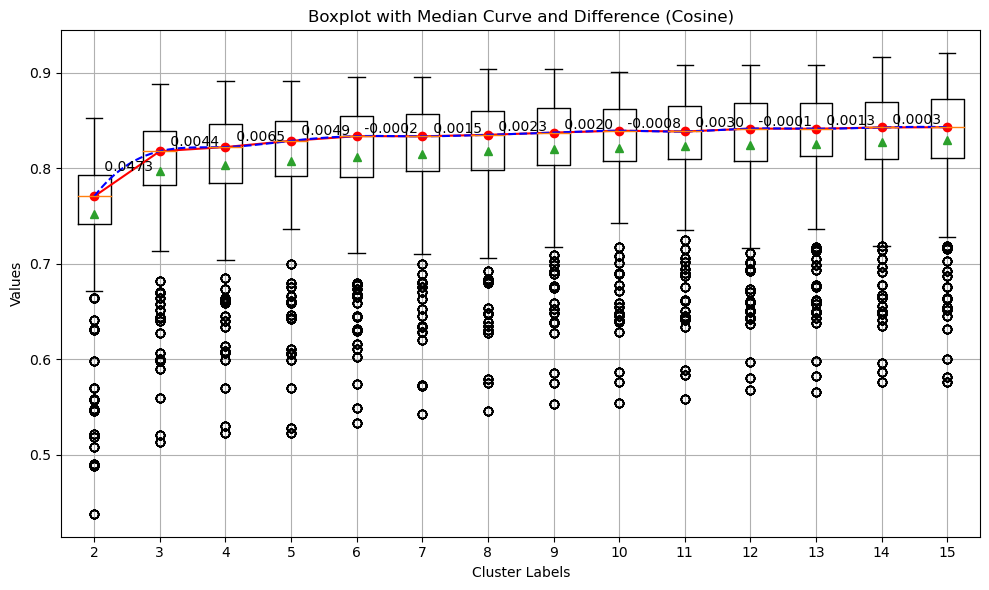

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract labels and data from resA_cosine
labels_cosine, data_cosine = zip(*resA_cosine.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data_cosine, showmeans=True)

# Calculate medians
medians_cosine = [np.median(d) for d in data_cosine]

# Plot lines connecting the medians
plt.plot(range(1, len(labels_cosine) + 1), medians_cosine, marker='o', color='red', linestyle='-')

# Calculate difference for each line between adjacent clusters
for i in range(len(medians_cosine) - 1):
    x1, y1 = i + 1, medians_cosine[i]
    x2, y2 = i + 2, medians_cosine[i + 1]
    difference = y2 - y1
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, f" {difference:.4f}", ha='center', va='bottom')

# Interpolate a curve connecting the medians
x_new_cosine = np.linspace(1, len(labels_cosine), 300)
spl_cosine = make_interp_spline(range(1, len(labels_cosine) + 1), medians_cosine, k=3)
y_smooth_cosine = spl_cosine(x_new_cosine)
plt.plot(x_new_cosine, y_smooth_cosine, color='blue', linestyle='--')

plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
plt.xlabel('Cluster Labels')
plt.ylabel('Values')
plt.title('Boxplot with Median Curve and Difference (Cosine)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Writing output
if WRITE_OUTPUT:
    with open(f"{output}/bicv_cosine.tsv", "w") as f:
        for i in range(len(labels_cosine)):
            for j in data_cosine[i]:
                f.write(str(labels_cosine[i]) + "\t" + str(j) + "\n")


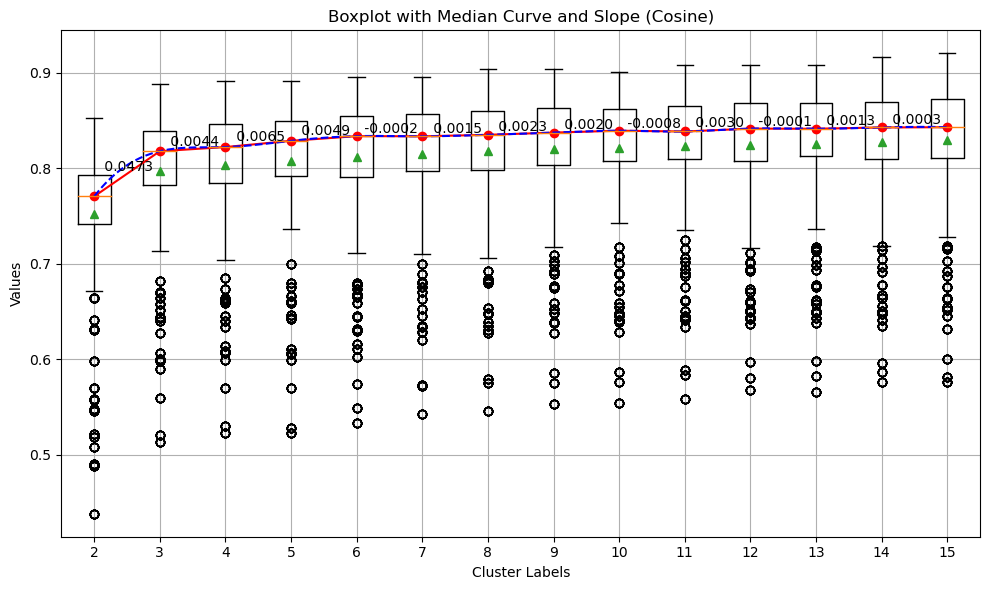

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract labels and data from resA_cosine
labels_cosine, data_cosine = zip(*resA_cosine.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data_cosine, showmeans=True)

# Calculate medians
medians_cosine = [np.median(d) for d in data_cosine]

# Plot lines connecting the medians
plt.plot(range(1, len(labels_cosine) + 1), medians_cosine, marker='o', color='red', linestyle='-')

# Calculate slope for each line between adjacent clusters
for i in range(len(medians_cosine) - 1):
    x1, y1 = i + 1, medians_cosine[i]
    x2, y2 = i + 2, medians_cosine[i + 1]
    slope = (y2 - y1) / (x2 - x1)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, f" {slope:.4f}", ha='center', va='bottom')

# Interpolate a curve connecting the medians
x_new_cosine = np.linspace(1, len(labels_cosine), 300)
spl_cosine = make_interp_spline(range(1, len(labels_cosine) + 1), medians_cosine, k=3)
y_smooth_cosine = spl_cosine(x_new_cosine)
plt.plot(x_new_cosine, y_smooth_cosine, color='blue', linestyle='--')

plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
plt.xlabel('Cluster Labels')
plt.ylabel('Values')
plt.title('Boxplot with Median Curve and Slope (Cosine)')
plt.grid(True)
plt.tight_layout()
plt.show()



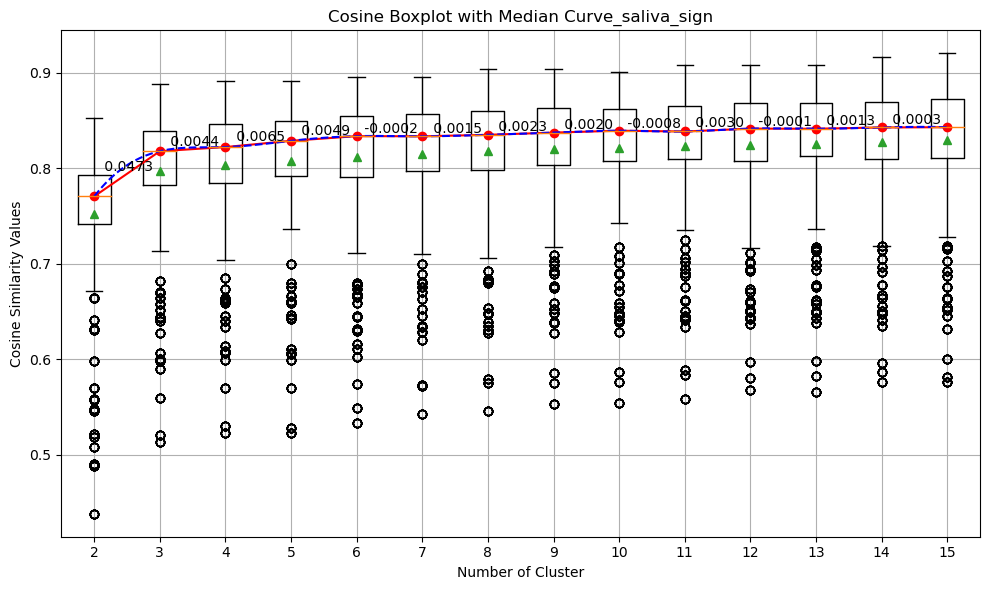

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extract labels and data from resA_cosine
labels_cosine, data_cosine = zip(*resA_cosine.items())

# Create boxplot with medians and means
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.boxplot(data_cosine, showmeans=True)

# Calculate medians
medians_cosine = [np.median(d) for d in data_cosine]

# Plot lines connecting the medians
plt.plot(range(1, len(labels_cosine) + 1), medians_cosine, marker='o', color='red', linestyle='-')

# Calculate slope for each line between adjacent clusters
for i in range(len(medians_cosine) - 1):
    x1, y1 = i + 1, medians_cosine[i]
    x2, y2 = i + 2, medians_cosine[i + 1]
    slope = (y2 - y1) / (x2 - x1)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, f" {slope:.4f}", ha='center', va='bottom')

# Interpolate a curve connecting the medians
x_new_cosine = np.linspace(1, len(labels_cosine), 300)
spl_cosine = make_interp_spline(range(1, len(labels_cosine) + 1), medians_cosine, k=3)
y_smooth_cosine = spl_cosine(x_new_cosine)
plt.plot(x_new_cosine, y_smooth_cosine, color='blue', linestyle='--')

plt.xticks(range(1, len(labels_cosine) + 1), labels_cosine)
plt.xlabel('Number of Cluster')
plt.ylabel('Cosine Similarity Values')
plt.title('Cosine Boxplot with Median Curve_saliva_sign')
plt.grid(True)
plt.tight_layout()
plt.savefig("boxplot_with_slope_15_279genus.png")
plt.show()

# Writing output
if WRITE_OUTPUT:
    with open(f"{output}/bicv_cosine.tsv", "w") as f:
        for i in range(len(labels_cosine)):
            for j in data_cosine[i]:
                f.write(str(labels_cosine[i]) + "\t" + str(j) + "\n")


In [40]:
meansA_cosine = {k: mean(resA_cosine[k]) for k in resA_cosine}
mediansA_cosine = {k: median(resA_cosine[k]) for k in resA_cosine}

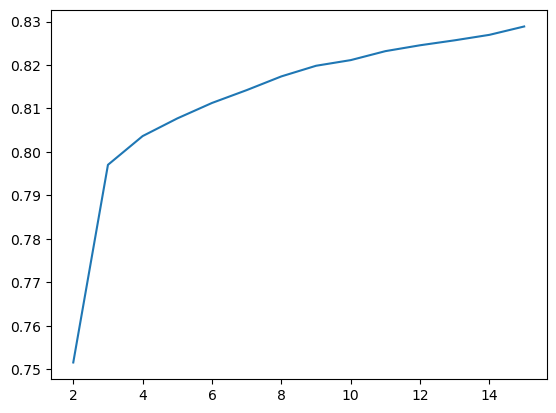

In [41]:
lists_cosine = sorted(meansA_cosine.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_cosine) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

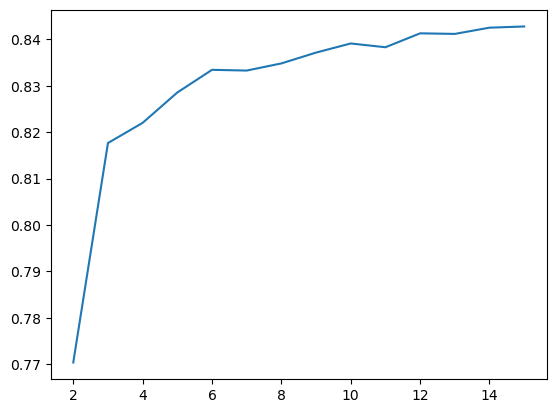

In [42]:
lists_cosine = sorted(mediansA_cosine.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_cosine) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

## L2 norm distance

In [43]:
raw_l2_file = inpdir + "biCV_l2norm.json"

In [44]:
with open(raw_l2_file, "r") as f:
    raw_l2 = json.load(f)

In [45]:
resdic_l2 = {k: {"A": [], "B": [], "C": [], "D": []} for k in range(2,16)}
resA_l2 = {k: [] for k in range(2,16)}

#raw is a list of dicts
for d in raw_l2: #run'th element of the list
    # d is a dict of dicts. Its keys are the matrices, subkeys are ranks. subsubkeys are A, B, C, D submatrices
    for mx in d:
        for rank in d[mx]:
            resA_l2[int(rank)].extend(d[mx][rank]["A"])
            for letter in d[mx][rank]:
                # we have a list of values depending on the number of repetitions
                resdic_l2[int(rank)][letter].extend(d[mx][rank][letter])

In [46]:
#print([len(resdic_l2[rank][letter]) for letter in "ABCD" for rank in resdic_l2])

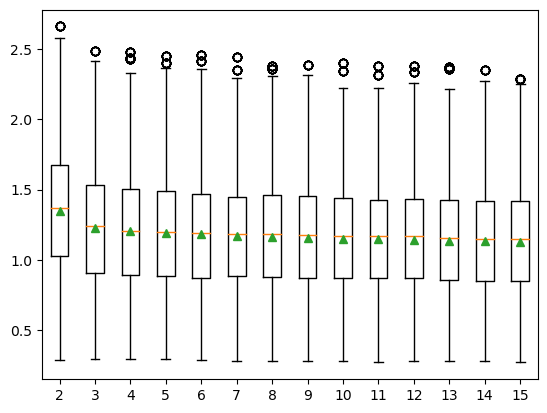

In [47]:
labels_l2, data_l2 = [*zip(*resA_l2.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
#labels, data = dict1.keys(), dict1.values()

plt.boxplot(data_l2, showmeans=True)
plt.xticks(range(1, len(labels_l2) + 1), labels_l2)
#plt.ylim(bottom=-1, top = 1.1)
plt.show()

if WRITE_OUTPUT:
    with open(f"{output}/bicv_l2norm.tsv", "w") as f:
        for i in range(0, len(labels_l2)):
            for j in data_l2[i]:
                f.write(str(labels_l2[i]) + "\t" + str(j) + "\n")

In [48]:
meansA_l2 = {k: mean(resA_l2[k]) for k in resA_l2}
mediansA_l2 = {k: median(resA_l2[k]) for k in resA_l2}

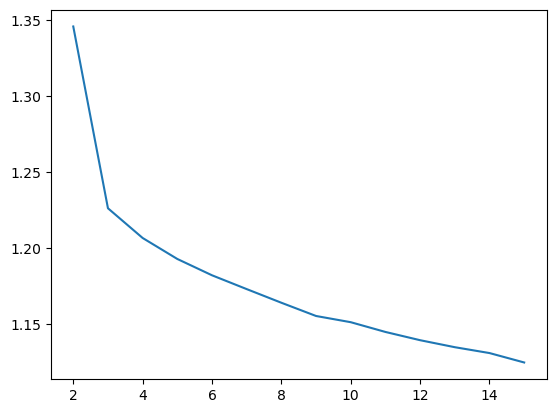

In [49]:
lists_l2 = sorted(meansA_l2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_l2) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

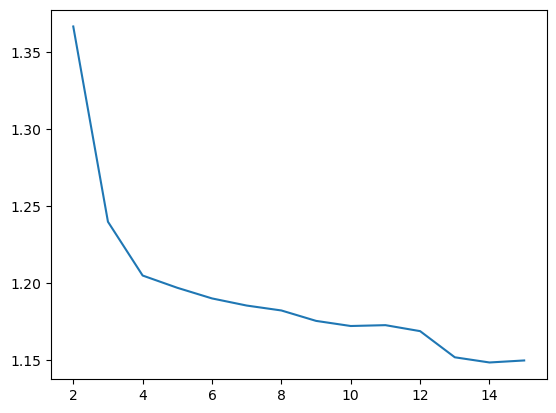

In [50]:
lists_l2 = sorted(mediansA_l2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists_l2) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()